In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:

df_1 = pd.read_csv("train_FD001.txt", sep=" ", header=None)
df_2 = pd.read_csv("train_FD002.txt", sep=" ", header=None)
df_3 = pd.read_csv("train_FD003.txt", sep=" ", header=None)
df_4 = pd.read_csv("train_FD004.txt", sep=" ", header=None)

print(df_1.head())


   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]


In [58]:
#Removing NaN columns

df_1 = df_1.iloc[:, :26]
df_2 = df_2.iloc[:, :26]
df_3 = df_3.iloc[:, :26]
df_4 = df_4.iloc[:, :26]

print(df_1.head())


   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

        25  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044  

[5 rows

In [59]:

missing_values_1 = df_1.isnull().sum()
missing_values_2 = df_2.isnull().sum()
missing_values_3 = df_3.isnull().sum()
missing_values_4 = df_4.isnull().sum()

print("Missing values per column:")
print(missing_values_1)
print(missing_values_2)
print(missing_values_3)
print(missing_values_4)

Missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64


In [60]:
#Assigning column names
col_names = [
    "engine_id", "cycle",
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

df_1.columns = col_names
df_2.columns = col_names
df_3.columns = col_names
df_4.columns = col_names

In [61]:
# Exploratory Data Analysis
print("Engines in DF1:", df_1['engine_id'].nunique())
print("Engines in DF2:", df_2['engine_id'].nunique())
print("Engines in DF3:", df_3['engine_id'].nunique())
print("Engines in DF4:", df_4['engine_id'].nunique())

df_1.groupby("engine_id")["cycle"].max().describe()

Engines in DF1: 100
Engines in DF2: 260
Engines in DF3: 100
Engines in DF4: 249


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64

In [62]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
import joblib

sensor_cols = [
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

def normalize_dataset(df, scaler_path):
    scaler = StandardScaler()
    df[sensor_cols] = scaler.fit_transform(df[sensor_cols])
    joblib.dump(scaler, scaler_path)
    return df

df_1 = normalize_dataset(df_1, "scaler_fd1.joblib")
df_2 = normalize_dataset(df_2, "scaler_fd2.joblib")
df_3 = normalize_dataset(df_3, "scaler_fd3.joblib")
df_4 = normalize_dataset(df_4, "scaler_fd4.joblib")


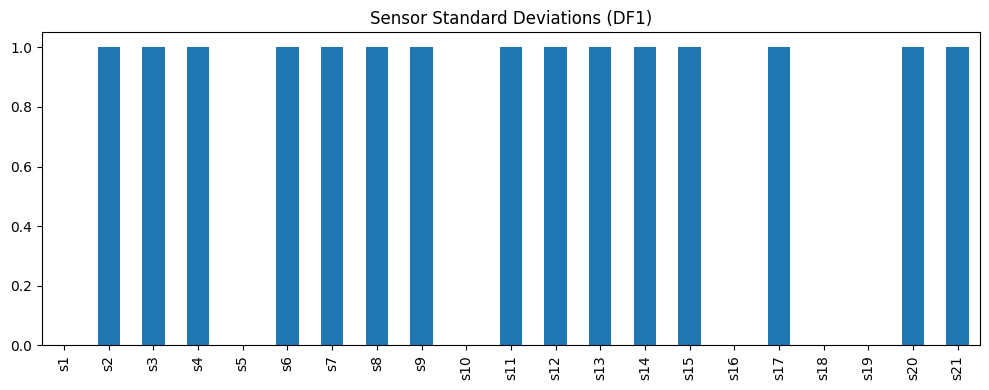


DF1 Dead Sensors: ['op3', 's1', 's5', 's10', 's16', 's18', 's19']


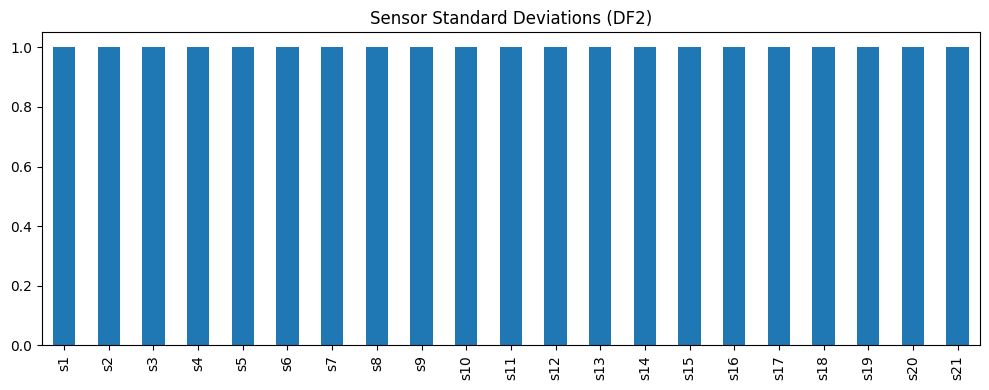


DF2 Dead Sensors: []


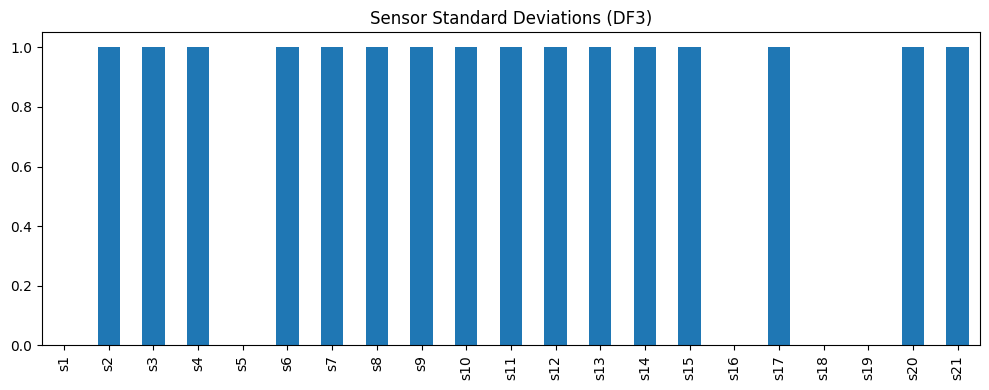


DF3 Dead Sensors: ['op3', 's1', 's5', 's16', 's18', 's19']


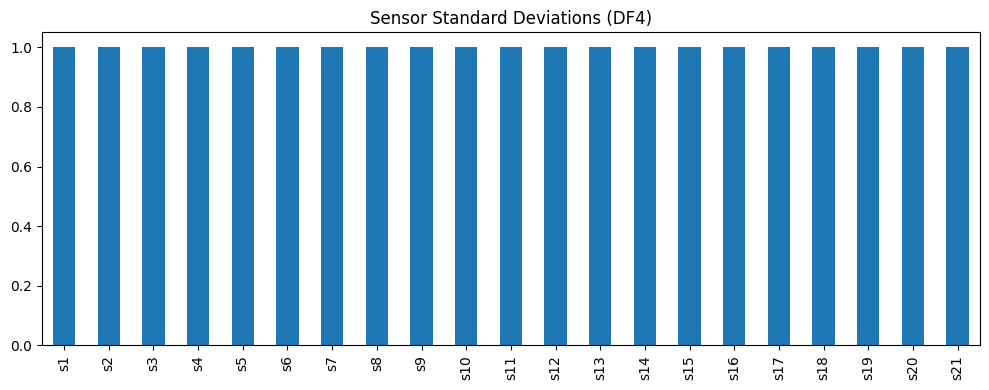


DF4 Dead Sensors: []


In [63]:
# Sensor trend visualization

import matplotlib.pyplot as plt

sensor_cols = [
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

dfs = {
    "DF1": df_1,
    "DF2": df_2,
    "DF3": df_3,
    "DF4": df_4
}

for name, df in dfs.items():


    plt.figure(figsize=(10,4))
    df.iloc[:, 5:26].std().plot(kind='bar')
    plt.title(f"Sensor Standard Deviations ({name})")
    plt.tight_layout()
    plt.show()

    dead_sensors = [col for col in sensor_cols if df[col].nunique() == 1]

    print(f"\n{name} Dead Sensors:", dead_sensors)


In [64]:
#Removing dead sensor columns

df_1 = df_1.drop(columns=[c for c in sensor_cols if df_1[c].nunique() == 1])
df_2 = df_2.drop(columns=[c for c in sensor_cols if df_2[c].nunique() == 1])
df_3 = df_3.drop(columns=[c for c in sensor_cols if df_3[c].nunique() == 1])
df_4 = df_4.drop(columns=[c for c in sensor_cols if df_4[c].nunique() == 1])

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)


(20631, 19)
(53759, 26)
(24720, 20)
(61249, 26)


In [65]:
# RUL Calculation

def compute_rul(df):

    max_cycle_df = df.groupby("engine_id")["cycle"].max().reset_index()
    max_cycle_df.columns = ["engine_id", "max_cycle"]

    df = df.merge(max_cycle_df, on="engine_id", how="left")
    df["RUL"] = df["max_cycle"] - df["cycle"]
    df.drop(columns=["max_cycle"], inplace=True)
    
    return df

df_1 = compute_rul(df_1)
df_2 = compute_rul(df_2)
df_3 = compute_rul(df_3)
df_4 = compute_rul(df_4)
print(df_1.head())

   engine_id  cycle       op1       op2        s2        s3        s4  \
0          1      1 -0.315980 -1.372953 -1.721725 -0.134255 -0.925936   
1          1      2  0.872722 -1.031720 -1.061780  0.211528 -0.643726   
2          1      3 -1.961874  1.015677 -0.661813 -0.413166 -0.525953   
3          1      4  0.324090 -0.008022 -0.661813 -1.261314 -0.784831   
4          1      5 -0.864611 -0.690488 -0.621816 -1.251528 -0.301518   

         s6        s7        s8        s9       s11       s12       s13  \
0  0.141683  1.121141 -0.516338 -0.862813 -0.266467  0.334262 -1.058890   
1  0.141683  0.431930 -0.798093 -0.958818 -0.191583  1.174899 -0.363646   
2  0.141683  1.008155 -0.234584 -0.557139 -1.015303  1.364721 -0.919841   
3  0.141683  1.222827  0.188048 -0.713826 -1.539489  1.961302 -0.224597   
4  0.141683  0.714393 -0.516338 -0.457059 -0.977861  1.052871 -0.780793   

        s14       s15       s17       s20       s21  RUL  
0 -0.269071 -0.603816 -0.781710  1.348493  1.194427

In [66]:
# RUL Capping to 125 to remove outliers

df_1["RUL"] = df_1["RUL"].clip(upper=125)
df_2["RUL"] = df_2["RUL"].clip(upper=125)
df_3["RUL"] = df_3["RUL"].clip(upper=125)
df_4["RUL"] = df_4["RUL"].clip(upper=125)


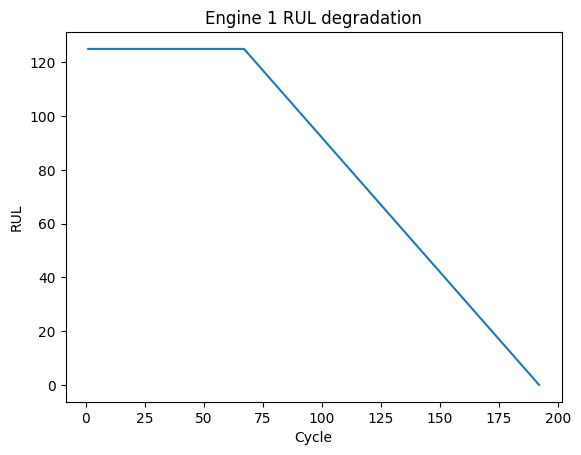

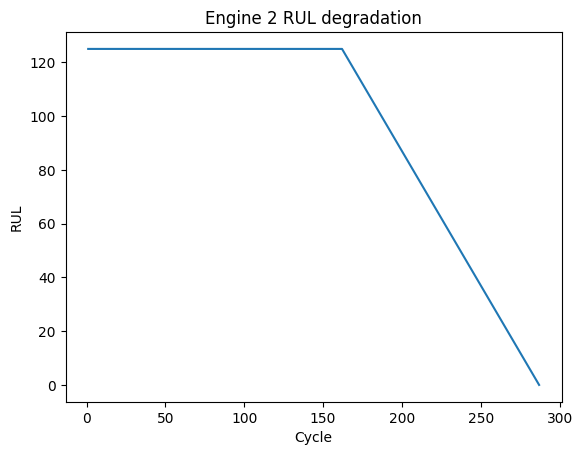

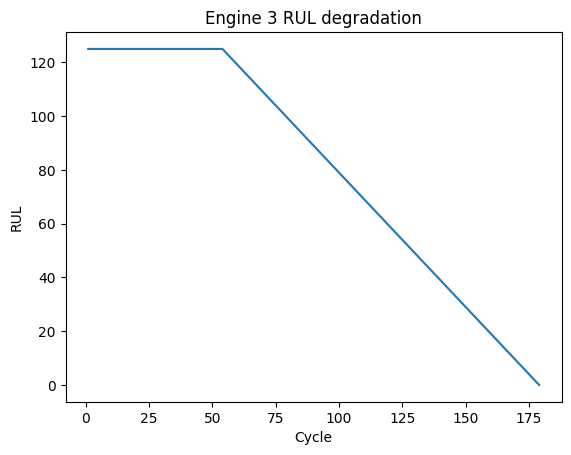

In [67]:
#RUL degradation

import matplotlib.pyplot as plt

sample_engines = df_1['engine_id'].unique()[:3]

for eng in sample_engines:
    temp = df_1[df_1.engine_id == eng]
    plt.plot(temp["cycle"], temp["RUL"])
    plt.title(f"Engine {eng} RUL degradation")
    plt.xlabel("Cycle")
    plt.ylabel("RUL")
    plt.show()


In [68]:
def create_sequences(df, sequence_length=30):
    X, y = [], []

    for engine_id in df['engine_id'].unique():
        engine_df = df[df['engine_id'] == engine_id]

        engine_features = engine_df.drop(columns=["engine_id", "cycle", "RUL"]).values
        engine_rul = engine_df["RUL"].values

        for i in range(len(engine_df) - sequence_length + 1):
            X.append(engine_features[i : i + sequence_length])
            y.append(engine_rul[i + sequence_length - 1])

    return np.array(X), np.array(y)


X_train_1, y_train_1 = create_sequences(df_1)
X_train_2, y_train_2 = create_sequences(df_2)
X_train_3, y_train_3 = create_sequences(df_3)
X_train_4, y_train_4 = create_sequences(df_4)

print(X_train_1.shape, y_train_1.shape)



(17731, 30, 17) (17731,)


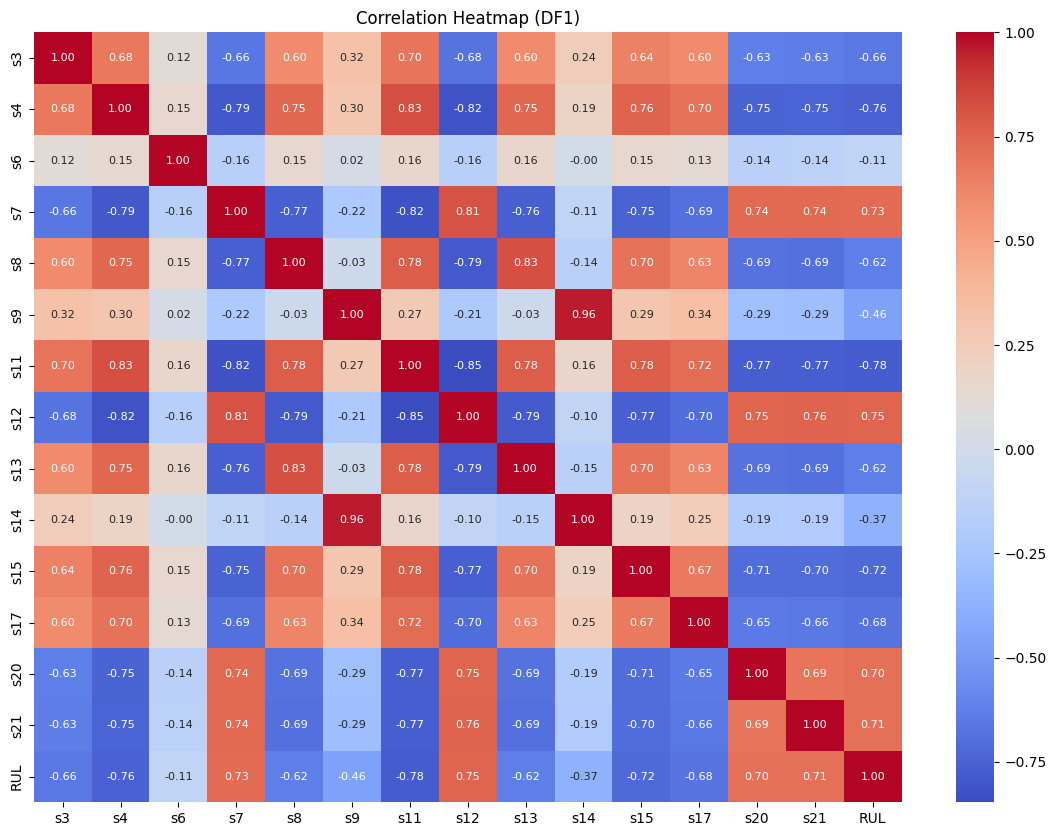

In [69]:

plt.figure(figsize=(14,10))
sns.heatmap(
    df_1.iloc[:, 5:26].corr(),
    cmap="coolwarm",
    annot=True,        #
    fmt=".2f",         
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap (DF1)")
plt.show()

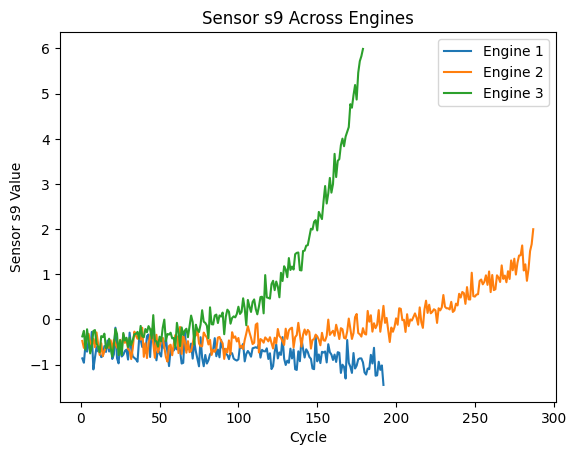

In [70]:
#Sensor s9 trend across engines

for eng in [1, 2, 3]:
    temp = df_1[df_1.engine_id == eng]
    plt.plot(temp["cycle"], temp["s9"], label=f"Engine {eng}")

plt.xlabel("Cycle")           
plt.ylabel("Sensor s9 Value") 
plt.legend()
plt.title("Sensor s9 Across Engines")
plt.show()
